In [1]:
%pip install Biopython

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqIO import SeqRecord

In [42]:
%pip install matplotlib
%pip install Levenshtein

  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached zipp-3.15.0-py3-none-any.whl (6.8 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Python39\\Lib\\site-packages\\PIL\\ImageChops.py'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached contourpy-1.0.7-cp39-cp39-win_amd64.whl (160 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


In [43]:
from Bio import SeqIO, pairwise2 as pw2
from collections import Counter
from matplotlib import pyplot as plt
from Bio.SeqUtils import MeltingTemp as mt, molecular_weight as mw, nt_search, seq3, Seq, GC
from Bio.pairwise2 import format_alignment
from Levenshtein import distance

In [44]:
Seq_a = SeqIO.read("KY352407.fasta", "fasta")
Seq_a = Seq_a.seq

Seq_b = SeqIO.read("OQ297732.fasta", "fasta")
temp = str(Seq_b.seq).replace("N", "")
temp = temp.replace("Y", "")
temp = temp.replace("W", "")
temp = temp.replace("R", "")
temp = temp.replace("M", "")
temp = temp.replace("S", "")
temp = temp.replace("K", "")
Seq_b = Seq(temp)

print(Seq_b)

CGAGTAACTCGTCTATCTTCTGCAGGTTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCATACCTTGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGTGACGTGCTTGTACGTGGCTTTGGAGACTCCGTAGAGGAGGCTTTATCAGAGGCACGTCAACATCTTAAGGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGTGTTTTACCTCAACTCGAACAACCCTATGTGTTCATCAAACGTTCTGATGCTCGAACTGCACCTCATGGCCATGTCATGGTTGAATTGGTTGCAGAACTCGATGGTGTTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTACTTGTCCCCCATGTGGGTGAGGTACCAGTTGCTTACCGTAAAGTTCTTCTTCGTAAGAACGGTAATAAGGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCTTTTGACTTAGGCGACGAGCTTGGAACTGATCCTATTGAAGATTTTCAAGAAAATTGGAACACTAAACATGGCAGTGGTGTTACCCGTGAACTCAAGCGTGAGCTCAACGGGGGTGCATATACTCGCTATGTAGACAACAACTTTTGTGGCCCAGATGGCTACCCCCTTGAGTGCATTAAAGACCTTCTGGCTCGTGCTGGTAAGGCTTCTTATGCTTTGTCTGAACAATTGGATTTTATTGACACTAAGAGAGGTGTTTACTGCTGCCGTGGACACGAGCATGAAATTGCTTGGTACACGGAACGCTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAGTTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAGTTTTGTATTTCCTCTAAATTCAACAATCAAGACCATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGTTTCATGGGCAGAA

In [45]:
# 1
# a
print(len(Seq_a))
print(len(Seq_b))

# b
print(Seq_a.find("CGC"))
print(Seq_b.find("CGC"))

# c
Seq_a_rev = Seq_a[:6]
seq_b_rev = Seq_b[-9:]
soal1c = (Seq_a_rev + seq_b_rev)

Seq_c = soal1c[::-1]

print(Seq_c)

29274
29050
117
512
GCCTATCGTGAAAAT


In [46]:
from Bio.SeqUtils import MeltingTemp as mt

In [47]:
# 2
# a
print(mt.Tm_Wallace(Seq_a))
print(mt.Tm_Wallace(Seq_b, strict=False))
print(mt.Tm_Wallace(Seq_c))

81508.0
80772.0
42.0


In [50]:
#GC
print(GC(Seq_a))
print(GC(Seq_b))
print(GC(Seq_c))

#AT
print(100 - GC(Seq_a))
print(100 - GC(Seq_b))
print(100 - GC(Seq_c))

39.21568627450981
39.0223752151463
40.0
60.78431372549019
60.9776247848537
60.0


In [52]:
# c
print(mw(Seq_a))
print(mw(Seq_b))
print(mw(Seq_c))

9050161.841500323
8978271.984700456
4655.9837


dict_keys(['T', 'A', 'G', 'C'])
dict_values([9440, 8354, 6052, 5428])


dict_keys(['C', 'G', 'A', 'T'])
dict_values([5470, 5866, 8524, 9190])


dict_keys(['G', 'C', 'T', 'A'])
dict_values([3, 3, 4, 5])


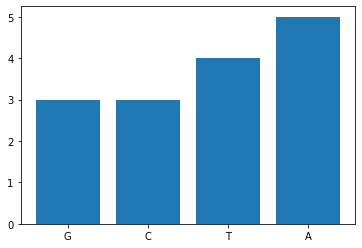

In [56]:
counterA = Counter(Seq_a)
counterB = Counter(Seq_b)
counterC = Counter(Seq_c)

keysA = counterA.keys()
valuesA = counterA.values()
print(keysA)
print(valuesA)
plt.bar(keysA, valuesA)
plt.show()

keysB = counterB.keys()
valuesB = counterB.values()
print(keysB)
print(valuesB)
plt.bar(keysB, valuesB)
plt.show()

keysC = counterC.keys()
valuesC = counterC.values()
print(keysC)
print(valuesC)
plt.bar(keysC, valuesC)
plt.show()

In [63]:
transcribeA = Seq_a.transcribe()
transcribeB = Seq_b.transcribe()
transcribeC = Seq_c.transcribe()

print(transcribeA)
print(transcribeB)
print(transcribeC)


translationA = transcribeA.translate()
translationB = transcribeB.translate()
translationC = transcribeC.translate()

print(translationA)
print(translationB)
print(translationC)

UAAAAGGAUUAAUCCUUCCCGGAAAAUCCUACCAAUCUCGAUCUCUUGCAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUACUUGUCACUUGGCUGUAUGCCCAGUGCAUUUACGCAGUAUAAAUUAUAAUUUUUACUGUCGUUGACAGGAAACGAGUAACUCGUCCGUCUUCUGCAGGUUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCAUACCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACUCACGUCCAACUCAGUUUACCUGUUUUACAGGUUAGCGACGUGCUAGUACGUGGAUUUGGUGAUACUGUUGAAGAAGCUAUCACUGAAGCACGUCAACAUUUAAUAGAUGGAACAUGUGGCAUUAUCAGUCUCCAGAAGGGUGUUUUACCCCAACUGGAACAGCCUUAUGUGUUCCUUAAACGUUCUGAUGCCUUUACUGCACCUCAUGGCCAUGUUAUGGUCGAGUUGGUCGCAGAAUUAAAUGGCAUUCAGUACGGUAGGAGCGGAGAAACGCUUGGUGUCUUAGUGCCACACACGUAUGAGACACCAACUGGUUACCGCAAGGUUCUUGUCCGUAAGAACGGUAAUAAGGGUGCUGGUGGCCAUUGCUACGGAGCCGAUCUAAAGUCUCCAGACUUAGGUGACGAGCUUGGCACUGACCCUAUUGAAGAUUAUGAAAACGACUGGAACACUAAACAUGGCAGUGGACUCAAACGUCAGCUCUUUAGAGAGCUGAAUGGUGGAGUUUACACUCGCUAUGUAGACAACAACUUCUGUGGUCCUGAUGGAUAUCCAUUGGACUGUAUUAAAGACUUGCUUGCUAGGGCCGGCAAAUCUUGUGCUCCACUCUCUGACCAAAUAGACUUUUUACAGUCUAAGAGAGGUGUGUACUGUUGCCGUGAGCAUGAGCAUGAAAUAGCUUGGUUCACUGAUCGCUCUGAGAAG

In [61]:
# 3
# a
Seq_a_transcribe = Seq_a.complement().transcribe()
print(Seq_a_transcribe)
Seq_b_transcribe = Seq_b.complement().transcribe()
print(Seq_b_transcribe)
Seq_c_transcribe = Seq_c.complement().transcribe()
print(Seq_c_transcribe)

# b
print("\n"+ Seq_a_transcribe.translate())
print(Seq_b_transcribe.translate())
print(Seq_c_transcribe.translate())

AUUUUCCUAAUUAGGAAGGGCCUUUUAGGAUGGUUAGAGCUAGAGAACGUCUAGACAAGAGAUUUGCUUGAAAUUUUAGACACAUGAACAGUGAACCGACAUACGGGUCACGUAAAUGCGUCAUAUUUAAUAUUAAAAAUGACAGCAACUGUCCUUUGCUCAUUGAGCAGGCAGAAGACGUCCAACGAAUGCCAAAGCAGGCACAACGUCGGCUAGUAGUCGUAUGGAUCCAAAGCAGGCCCACACUGGCUUUCCAUUCUACCUCUCGGAACAGGGACCAAAGUUGCUCUUUUGAGUGCAGGUUGAGUCAAAUGGACAAAAUGUCCAAUCGCUGCACGAUCAUGCACCUAAACCACUAUGACAACUUCUUCGAUAGUGACUUCGUGCAGUUGUAAAUUAUCUACCUUGUACACCGUAAUAGUCAGAGGUCUUCCCACAAAAUGGGGUUGACCUUGUCGGAAUACACAAGGAAUUUGCAAGACUACGGAAAUGACGUGGAGUACCGGUACAAUACCAGCUCAACCAGCGUCUUAAUUUACCGUAAGUCAUGCCAUCCUCGCCUCUUUGCGAACCACAGAAUCACGGUGUGUGCAUACUCUGUGGUUGACCAAUGGCGUUCCAAGAACAGGCAUUCUUGCCAUUAUUCCCACGACCACCGGUAACGAUGCCUCGGCUAGAUUUCAGAGGUCUGAAUCCACUGCUCGAACCGUGACUGGGAUAACUUCUAAUACUUUUGCUGACCUUGUGAUUUGUACCGUCACCUGAGUUUGCAGUCGAGAAAUCUCUCGACUUACCACCUCAAAUGUGAGCGAUACAUCUGUUGUUGAAGACACCAGGACUACCUAUAGGUAACCUGACAUAAUUUCUGAACGAACGAUCCCGGCCGUUUAGAACACGAGGUGAGAGACUGGUUUAUCUGAAAAAUGUCAGAUUCUCUCCACACAUGACAACGGCACUCGUACUCGUACUUUAUCGAACCAAGUGACUAGCGAGACUCUUC

In [74]:
from Bio import pairwise2 as pw2

In [64]:
# 4
# a
Seq_new = Seq("TGTACATTATAATGCTCTATTTTCTCGC")
# print(Seq_new)
local_alignment = pw2.align.localxx(Seq_a, Seq_new, score_only=True)
print(local_alignment)

28.0


In [66]:
newSequence1 = Seq("TGTACATTATAATGCTCTATTTTCTCGC")


local_alignment1 = pw2.align.localxx(Seq_a, newSequence1)

for i in local_alignment1:
    print(format_alignment(*i))

29176 TGCCTATATGGAAGAGCCCTAATGTGTAAAATTATTTTAGTAGTGCTATCCCATGTGATTTTAATAGCTTCTCAGGAGAATGAC
      ||      |     |   |           ||||   ||  | |||  |  |   | |   |  |   |||||        | |
    1 TG------T-----A---C-----------ATTA---TA--A-TGC--T--C---T-A---T--T---TTCTC--------G-C
  Score=28

29166 TAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTATTTTAGTAGTGCTATCCCATGTGATTTTAATAGCTTCTCAGGAGAATGAC
      |          |      |     |   |           ||||   ||  | |||  |  |   | |   |  |   |||||        | |
    1 T----------G------T-----A---C-----------ATTA---TA--A-TGC--T--C---T-A---T--T---TTCTC--------G-C
  Score=28

29163 TGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTATTTTAGTAGTGCTATCCCATGTGATTTTAATAGCTTCTCAGGAGAATGAC
      |             |      |     |   |           ||||   ||  | |||  |  |   | |   |  |   |||||        | |
    1 T-------------G------T-----A---C-----------ATTA---TA--A-TGC--T--C---T-A---T--T---TTCTC--------G-C
  Score=28

29160 TAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTATTTTAGTAGTGCTATCCCAT

In [69]:
# b
Seq_new = Seq("CAGAGTAATGTGTACAGATATTGGGCTC")
# print(Seq_new)
local_alignment = pw2.align.localxx(Seq_b, Seq_new, score_only=True)
print(local_alignment)

28.0


In [70]:
# c
print(distance(Seq_a, Seq_b))

7357
